In [1]:
import networkx as nx

In [2]:

def get_winnin_cards(clean_line:list) -> tuple:
    list_data =[]
    for n,line in enumerate(clean_line):
        card_num= f"card_{n+1}"
        winning_num_list = [int(numb.strip()) for numb in line.split("|")[0].split(':')[1].split(" ") if numb.strip() != ""]
        played_num_list = [int(numb.strip()) for numb in line.split("|")[1].split(" ") if numb.strip() != ""]
        scored_numbers = [winner for winner in played_num_list if winner in winning_num_list]
        list_data.append([card_num, len(scored_numbers)])
    return list_data

In [3]:
# apply logic for out of idx cards

def get_card_tree_relations(card_list: list) -> list:
    """
    takes list of cards and total number of winning numbers and returns
    node relations.
    example input : card_list = [["card1", 1],["card2", 1], ["card3", 3]]
    example output: ['card1 : card2' , 'card2 : card3']
    :params: card_list
    :returns: list of card relations
    """
    relations = []
    for n,card in enumerate(card_list):
        if card[1] > len(card_list)-(n+1):
            itr_range = len(card_list)-(n+1)
        else:
            itr_range = card[1]
        if itr_range != 0:
            for i in range(itr_range):
                relations.append(
                    (card[0] ,"card_" + str((n+i)+2))
                )
    return relations

In [4]:
sample = """Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11"""

In [5]:
data = sample.split("\n")

In [6]:
data

['Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53',
 'Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19',
 'Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1',
 'Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83',
 'Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36',
 'Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11']

In [4]:
with open("day4Data.txt") as f:
        lines = f.readlines()

In [34]:
winners = get_winnin_cards(data)

In [8]:
winners = [x for x in winners if x[1] !=0 ]

In [35]:
winners

[['card_1', 4],
 ['card_2', 2],
 ['card_3', 2],
 ['card_4', 1],
 ['card_5', 0],
 ['card_6', 0]]

In [11]:
get_card_tree_relations(get_winnin_cards(data))

[('card_1', 'card_2'),
 ('card_1', 'card_3'),
 ('card_1', 'card_4'),
 ('card_1', 'card_5'),
 ('card_2', 'card_3'),
 ('card_2', 'card_4'),
 ('card_3', 'card_4'),
 ('card_3', 'card_5'),
 ('card_4', 'card_5')]

In [8]:
G = nx.DiGraph()
G.add_edges_from(get_card_tree_relations(get_winnin_cards(data)))

In [13]:
nx.descendants(G,'card_2')

{'card_3', 'card_4', 'card_5'}

In [18]:
winners = list(G.nodes)

In [19]:
winners

['card_1', 'card_2', 'card_3', 'card_4', 'card_5']

In [20]:
count= len(nx.descendants(G,winners[0]))

In [21]:
count= len(nx.descendants(G,winners[0]))
for winner_card in winners:
    # counts = len(nx.descendants(G,winner_card[0]))
    for node in nx.descendants(G,winner_card):
        count += len(nx.descendants(G,node))

In [22]:
count+ len(data)

20

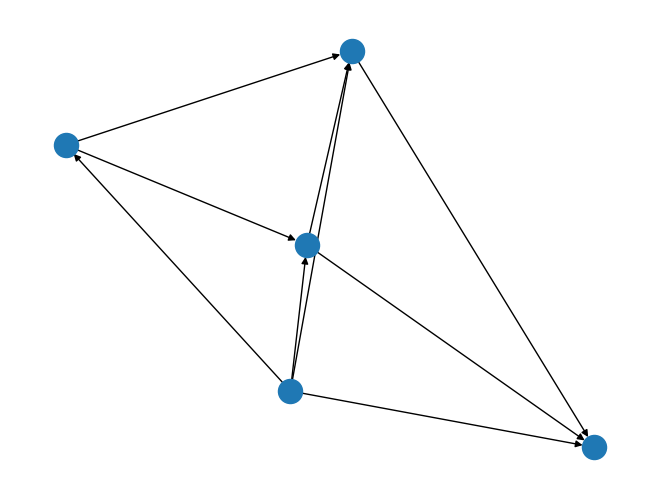

In [10]:
nx.draw(G)